#Lazy Predict

In [ ]:
!pip install lazypredict

     |████████████████████████████████| 1.2 MB 5.3 MB/s 
     |████████████████████████████████| 14.5 MB 23.9 MB/s 
     |████████████████████████████████| 127.6 MB 20 kB/s 
     |████████████████████████████████| 25.9 MB 40.9 MB/s 
     |████████████████████████████████| 10.1 MB 24.5 MB/s 
     |████████████████████████████████| 248 kB 31.1 MB/s 
     |████████████████████████████████| 302 kB 25.4 MB/s 
     |████████████████████████████████| 6.8 MB 26.1 MB/s 
     |████████████████████████████████| 72 kB 736 kB/s 
     |████████████████████████████████| 269 kB 34.4 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=618c26205b5d3f0487b6801ec72f8d62c22da3d5488cd26a7319ab107c977610
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

%cd '/content/gdrive/My Drive/LDS0_K273_ONLINE_DoThiPhuong/Topic_3/'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS0_K273_ONLINE_DoThiPhuong/Topic_3


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data = pd.read_csv('foody_08032022pre.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22296 entries, 0 to 22295
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant     22296 non-null  object 
 1   review_text    22296 non-null  object 
 2   review_score   22296 non-null  float64
 3   review_text_1  22296 non-null  object 
 4   label          22296 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 871.1+ KB


In [ ]:
data.head()

,restaurant,review_text,review_score,review_text_1,label
0,Chả Cá Hà Nội Xưa,"Nhà hàng mới đổi địa chỉ sang 24 Hồng Hà, khá ...",8.80,đổi địa_chỉ khá uống cực khá ổn chuẩn laịii,1
1,Chả Cá Hà Nội Xưa,Quán đã chuyển về 22 Hồng Hà cới phong cách kh...,3.20,cới đổi tệ nhất ngâm tím không mùi_vị đắt nâng...,0
2,Chả Cá Hà Nội Xưa,"Giá niêm yết trên foody một kiểu, giá lúc ship...",3.20,niêm_yết shipper kêu bực_mình không tiếc đặt_h...,0
3,Chả Cá Hà Nội Xưa,Xem review thấy mọi người khen chả cá lã vọng ...,7.00,review chả_cá vọng vọng ăn_giá_cả đợi không kh...,1
4,Chả Cá Hà Nội Xưa,Tối nay mới đi ăn quán này món chả cá lã vọng ...,9.20,vọng đậu khá không đắt khá ân_cần vọng kêu thử...,1


In [ ]:
len(data.restaurant.unique())

566

Dữ liệu gồm 22296 đánh giá cho 566 nhà hàng.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data.groupby('label').review_text_1.count()

label
0     5549
1    16747
Name: review_text_1, dtype: int64

Dữ liệu bị mất cân bằng. Cần resample để dự đoán tốt hơn.


In [ ]:
data_train, data_test = train_test_split(data, test_size=0.20, random_state = 42) 

In [ ]:
data_train.shape, data_test.shape

((17836, 5), (4460, 5))

In [ ]:
data_train.groupby('label').review_text_1.count()

label
0     4434
1    13402
Name: review_text_1, dtype: int64

In [ ]:
data_train_0 = data_train[data_train.label == 0]
data_train_1 = data_train[data_train.label == 1]

In [ ]:
from sklearn.utils import resample

In [ ]:
# data_train_0_resample = resample(data_train_0, 
#                            replace = True,
#                            n_samples = 5937,
#                            random_state = 27)

In [ ]:
data_train_1_resample = resample(data_train_1, 
                           replace = True,
                           n_samples = 4500,
                           random_state = 27)

In [ ]:
data_train_new = pd.concat([data_train_0, data_train_1_resample])

In [ ]:
data_train_new.to_csv('data_train_resample.csv')

In [ ]:
data_train.shape, data_train_new.shape

((17836, 5), (8934, 5))

In [ ]:
source = data_train_new['review_text_1']
type(source)

pandas.core.series.Series

In [ ]:
source[:5]

3669     ghé đông trả_lời mà_còn không thèm tiếp vắng k...
11223                             thoáng sạch_sẽ không lắm
21341                              khách_hàng ưu_tiên đuọc
13661    mắc thích trứng trải tạm gỏi khô xoài không kh...
19705                                             tệ không
Name: review_text_1, dtype: object

In [ ]:
target = data_train_new['label']
type(target)

pandas.core.series.Series

In [ ]:
text_data = np.array(source)
text_data

array(['ghé đông trả_lời mà_còn không thèm tiếp vắng không đông',
       'thoáng sạch_sẽ không lắm', 'khách_hàng ưu_tiên đuọc', ...,
       'thái_hà alley nhất đặt_hàng thử loship miễn_phí đồ_uống bù vận_chuyển không chuyên_nghiệp lắm thông_cảm khá mất đẹp bình_thường sẵn đen không đặc_sắc lắm trông yêu yêu',
       'không điện shipper đem bù ủng_hộ', 'đọc'], dtype=object)

In [ ]:
count = CountVectorizer(max_features=1000)
count.fit(text_data)
bag_of_words = count.transform(text_data)
bag_of_words

<8934x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 87417 stored elements in Compressed Sparse Row format>

In [ ]:
X_train = bag_of_words.toarray()
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train.shape

(8934, 1000)

In [ ]:
y_train = np.array(target)

In [ ]:
y_train.shape

(8934,)

In [ ]:
source_test = data_test['review_text_1']
type(source_test)

pandas.core.series.Series

In [ ]:
target_test = data_test['label']
type(target_test)

pandas.core.series.Series

In [ ]:
text_data_test = np.array(source_test)
text_data_test

array(['khá mềm nấu mềm',
       'không nhất cực thích_hợp nhất sống ảo đậm chất đoán lịch_sự bất_hủ cảm_nhận ổn_định hài_lòng thích chả đậm thích chả_hiểu đậm thơm cực_kì đồ_uống',
       'đình bồ_kết liền chạy hàn rẻ trái xây mát dịu trắng tức_là ân tiêu gỏi khá chế_biến khá',
       ..., 'không tốt bảo bảo đề_nghị', 'tố khá đông đậu tiện chém',
       'giảm mê hơi xúc_xích chiên chiên không hài_lòng bánh_mì thẳng không lót mất ổn dẻo dưa rẻ chiên quéo không kèm không sẵn cười_cười cải_thiện khá chất_lượng không ổn lắm'],
      dtype=object)

In [ ]:
bag_of_words_test = count.transform(text_data_test)
bag_of_words_test

<4460x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 45542 stored elements in Compressed Sparse Row format>

In [ ]:
X_test = bag_of_words_test.toarray()
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_test = np.array(target_test)

In [ ]:
X_test.shape, y_test.shape

((4460, 1000), (4460,))

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [08:30<00:00, 17.60s/it]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.80,0.79,0.79,0.81,4.26
XGBClassifier,0.78,0.79,0.79,0.79,26.55
ExtraTreesClassifier,0.79,0.78,0.78,0.80,10.58
BernoulliNB,0.76,0.78,0.78,0.78,0.59
RandomForestClassifier,0.79,0.78,0.78,0.80,5.89
SVC,0.76,0.78,0.78,0.78,111.26
NearestCentroid,0.75,0.77,0.77,0.76,0.53
NuSVC,0.75,0.77,0.77,0.77,128.35
CalibratedClassifierCV,0.76,0.77,0.77,0.78,79.19


Dựa trên Accuracy, Balanced Accuracy, F1 Score, Time Taken em lựa chọn các thuật toán sau để build model:
- LGBMClassifier
- ExtraTreesClassifier
- RandomForestClassifier

# 1. LGBMClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
target_names = ['dislike - 0', 'like - 1']

In [ ]:
from sklearn. metrics import roc_auc_score, roc_curve
from cv2 import threshold

In [ ]:
import lightgbm as lgb
lg= lgb.LGBMClassifier()
lg.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
y_pred=lg.predict(X_test)

In [ ]:
lg.score(X_train, y_train)

0.8588538168793374

In [ ]:
lg.score(X_test, y_test)

0.7955156950672646

In [ ]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.7955156950672646, 0.7955156950672646, 0.7955156950672647, None)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.79      0.66      1115
           1       0.92      0.80      0.85      3345

    accuracy                           0.80      4460
   macro avg       0.74      0.79      0.76      4460
weighted avg       0.83      0.80      0.81      4460



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 885,  230],
       [ 682, 2663]])

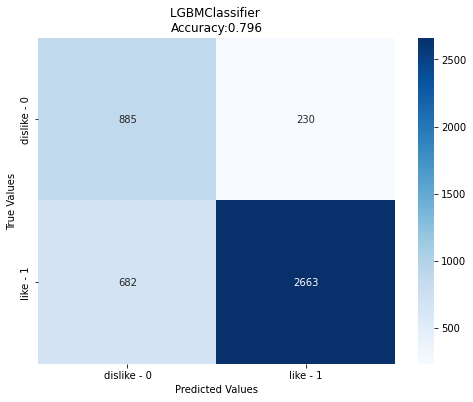

In [ ]:
cm_df = pd.DataFrame(cm,
                      index = target_names,
                      columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('LGBMClassifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
y_prob = lg.predict_proba(X_test)
roc = roc_auc_score(y_test, y_prob[:, 1])
roc

0.8718517028963648

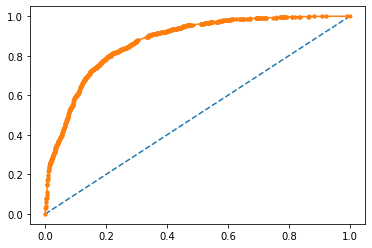

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle= '--')
ax.plot(fpr, tpr, marker = '.')
plt.show()

# 2. ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
ex_trees = ExtraTreesClassifier()

In [ ]:
ex_trees.fit(X_train,y_train)

ExtraTreesClassifier()

In [ ]:
y_pred=ex_trees.predict(X_test)

In [ ]:
ex_trees.score(X_train, y_train)

0.9900380568614282

In [ ]:
ex_trees.score(X_test, y_test)

0.7829596412556054

In [ ]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.7829596412556054, 0.7829596412556054, 0.7829596412556052, None)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.78      0.64      1115
           1       0.91      0.78      0.84      3345

    accuracy                           0.78      4460
   macro avg       0.73      0.78      0.74      4460
weighted avg       0.82      0.78      0.79      4460



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 869,  246],
       [ 722, 2623]])

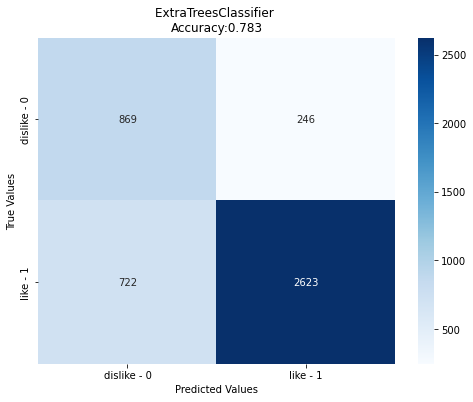

In [ ]:
cm_df = pd.DataFrame(cm,
                      index = target_names,
                      columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('ExtraTreesClassifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
y_prob = ex_trees.predict_proba(X_test)
roc = roc_auc_score(y_test, y_prob[:, 1])
roc

0.8423182985112645

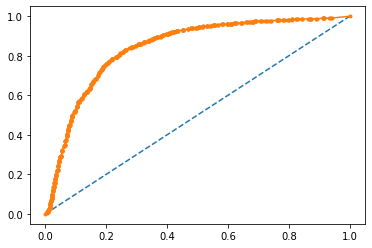

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle= '--')
ax.plot(fpr, tpr, marker = '.')
plt.show()

# 3. RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
rf.score(X_train, y_train)

0.989926124916051

In [ ]:
rf.score(X_test, y_test)

0.7894618834080718

In [ ]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.7894618834080718, 0.7894618834080718, 0.7894618834080718, None)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.77      0.65      1115
           1       0.91      0.80      0.85      3345

    accuracy                           0.79      4460
   macro avg       0.73      0.78      0.75      4460
weighted avg       0.82      0.79      0.80      4460



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 861,  254],
       [ 685, 2660]])

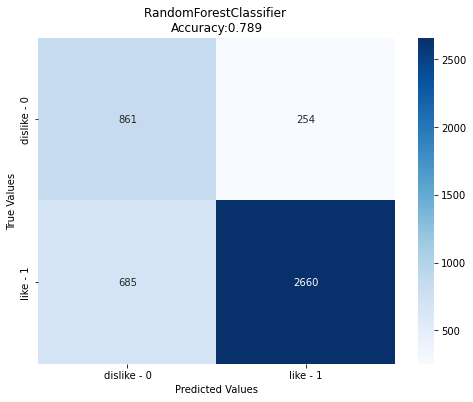

In [ ]:
cm_df = pd.DataFrame(cm,
                      index = target_names,
                      columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('RandomForestClassifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
y_prob = rf.predict_proba(X_test)
roc = roc_auc_score(y_test, y_prob[:, 1])
roc

0.8449406449623627

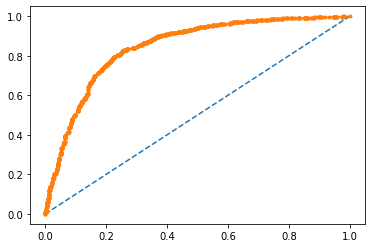

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle= '--')
ax.plot(fpr, tpr, marker = '.')
plt.show()

Sau khi thử nghiệm các model thì em lựa chọn model LGBMClassifier() để dự đoán vì có accuracy tạm chấp nhận được.

In [ ]:
import pickle

In [ ]:
with open('food_LGBMClassifier.pkl', mode = 'wb') as pkl:
  pickle.dump(lg, pkl)

In [ ]:
with open('Count_vector.pkl', mode = 'wb') as pkl:
  pickle.dump(count, pkl)